In [3]:
import pandas as pd
import numpy as np  

In [5]:

# Path to your Excel file
excel_path = r'C:\Doc\stash\test-project\data1.xlsx'  # Use raw string to avoid unicode escape error
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(excel_path, sheet_name=None)
# Merge all sheets into one DataFrame, adding a column for sheet name
merged_df1 = pd.concat([df.assign(sheet_name=sheet) for sheet, df in all_sheets.items()], ignore_index=True)

# Path to your Excel file
excel_path = r'C:\Doc\stash\test-project\data2.xlsx'  # Use raw string to avoid unicode escape error
# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(excel_path, sheet_name=None)
# Merge all sheets into one DataFrame, adding a column for sheet name
merged_df2 = pd.concat([df.assign(sheet_name=sheet) for sheet, df in all_sheets.items()], ignore_index=True)

df = pd.concat([merged_df1, merged_df2], ignore_index=True)

In [6]:
# Create a mapping dictionary between sheet names and sym values
sheet_to_sym = {
    'audusd': 'AUDUSD', 'c 1': 'C1', 'cl1': 'CL1', 'co1': 'CO1', 'eurusd': 'EURUSD', 'gbpusd': 'GBPUSD', 
    'gjgb1': 'GJGB1', 'gjgb10': 'GJGB10', 'gjgb30': 'GJGB30', 'gjgb5': 'GJGB5', 'hg1': 'HG1', 'hsi': 'HSI',
    'hxc': 'HXC', 'ihn+1m': 'USDIDR', 'irn+1m': 'USDINR', 'kc1': 'KC1', 'kwn+1m': 'USDKRW', 'la1': 'LA1', 
    'ndx': 'NDX', 'ng1': 'NG1', 'nky': 'NKY', 'ntn+1m': 'USDTWD', 'nzdusd': 'NZDUSD', 'ppn+1m': 'USDPHP', 
    'rr1': 'RR1', 'shcomp': 'SHCOMP', 'shsz300': 'SHSZ300', 'spx': 'SPX', 'ukx': 'UKX', 'usdcad': 'USDCAD', 
    'usdchf': 'USDCHF', 'usdcnh': 'USDCNH', 'usddxy': 'USDDXY', 'usdjpy': 'USDJPY', 'usdnok': 'USDNOK',
    'usdsek': 'USDSEK', 'usdsgd': 'USDSGD', 'usdthb': 'USDTHB', 'usgg10yr': 'US10', 'usgg12m': 'US1', 
    'usgg1m': 'US1M', 'usgg30yr': 'US30', 'usgg5yr': 'US5', 'w 1': 'W1', 'xag': 'XAGUSD', 
    'xau': 'XAUUSD', 'xbt': 'BTCUSD', 'xetusd': 'ETHUSD'
}

# Create a new column 'sym' using the mapping
df['sym'] = df['sheet_name'].map(sheet_to_sym)

In [7]:
asset_name = [
    'GJGB10', 'HSI', 'HXC', 'NDX', 'SPX', 'NKY', 'SHCOMP', 'SHSZ300', 'UKX', 'USDDXY', 
    'US10', 'US1M', 'US30', 'XAGUSD', 'XAUUSD'
 ]

# Select only relevant columns and rows for pivoting
df_selected = df[df['sym'].isin(asset_name)][['Date', 'sym', 'Close']]

# Pivot the DataFrame: index='Date', columns='sym', values='Close'
pivot_df = df_selected.pivot(index='Date', columns='sym', values='Close')

# Display the pivoted DataFrame
pivot_df.head()

sym,GJGB10,HSI,HXC,NDX,NKY,SHCOMP,SHSZ300,SPX,UKX,US10,US1M,US30,USDDXY,XAGUSD,XAUUSD
Date,,,,,,,,,,,,,,,
2000-01-03,NaN,17369.63,NaN,3790.55,NaN,NaN,NaN,1455.22,NaN,6.592,NaN,6.622,100.22,5.405,289.00
2000-01-04,1.738,17072.82,NaN,3546.20,19002.86,1406.371,NaN,1399.42,6665.9,6.497,NaN,6.537,100.41,5.325,282.25
2000-01-05,1.699,15846.72,NaN,3507.31,18542.55,1409.682,NaN,1402.11,6535.9,6.594,NaN,6.621,100.38,5.145,280.00
2000-01-06,1.685,15153.23,NaN,3340.81,18168.27,1463.942,NaN,1403.45,6447.2,6.524,NaN,6.553,100.48,5.120,281.10
2000-01-07,1.719,15405.63,NaN,3529.60,18193.41,1516.604,NaN,1441.47,6504.8,6.515,NaN,6.546,100.72,5.175,281.75


In [21]:
# Forward fill missing values and drop any remaining nulls
pivot_df_filled = pivot_df.ffill().dropna()
# Reset index so the key column (Date) becomes a normal column
pivot_df_final = pivot_df_filled.reset_index()

pivot_df_final['GJGB10'] = np.exp(-10*pivot_df_final['GJGB10']/100)
pivot_df_final['US10'] = np.exp(-10*pivot_df_final['US10']/100)
pivot_df_final['US1M'] = np.exp(-(1/12)*pivot_df_final['US1M']/100)
pivot_df_final['US30'] = np.exp(-30*pivot_df_final['US30']/100)

pivot_df_final.head()

sym,Date,GJGB10,HSI,HXC,NDX,NKY,SHCOMP,SHSZ300,SPX,UKX,US10,US1M,US30,USDDXY,XAGUSD,XAUUSD
0,2002-01-04,0.869097,11702.15,1351.74,1675.03,10871.49,1611.393,1316.46,1172.51,5323.8,0.598817,0.998576,0.189304,116.33,4.70,278.95
1,2002-01-07,0.870315,11892.64,1375.23,1649.83,10942.36,1596.760,1302.08,1164.89,5293.6,0.603566,0.998593,0.192743,116.33,4.71,278.75
2,2002-01-08,0.869445,11713.71,1394.96,1666.58,10695.60,1583.461,1292.71,1160.71,5250.4,0.601698,0.998584,0.190386,116.83,4.69,279.05
3,2002-01-09,0.870663,11440.72,1357.56,1653.76,10663.98,1561.349,1272.65,1155.14,5228.5,0.603445,0.998643,0.192223,117.01,4.82,283.95
4,2002-01-10,0.869793,11256.07,1329.60,1656.68,10538.43,1576.437,1281.26,1156.55,5190.7,0.607806,0.998609,0.196951,116.88,4.79,286.35


In [27]:
from sklearn.decomposition import PCA
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [22]:
# compute daily return
price_cols = [col for col in pivot_df_final.columns if col != 'Date']
pivot_df_final = pivot_df_final.sort_values('Date')
returns = np.log(pivot_df_final[price_cols] / pivot_df_final[price_cols].shift(1)).dropna()


In [26]:
returns

sym,GJGB10,HSI,HXC,NDX,NKY,SHCOMP,SHSZ300,SPX,UKX,US10,US1M,US30,USDDXY,XAGUSD,XAUUSD
1,0.0014,0.016147,0.017228,-0.015159,0.006498,-0.009122,-0.010983,-0.006520,-0.005689,0.00790,0.000017,0.01800,0.000000,0.002125,-0.000717
2,-0.0010,-0.015160,0.014245,0.010101,-0.022809,-0.008364,-0.007222,-0.003595,-0.008194,-0.00310,-0.000008,-0.01230,0.004289,-0.004255,0.001076
3,0.0014,-0.023581,-0.027177,-0.007722,-0.002961,-0.014063,-0.015639,-0.004810,-0.004180,0.00290,0.000059,0.00960,0.001540,0.027341,0.017407
4,-0.0010,-0.016271,-0.020811,0.001764,-0.011843,0.009617,0.006743,0.001220,-0.007256,0.00720,-0.000034,0.02430,-0.001112,-0.006244,0.008417
5,-0.0006,-0.007993,-0.000677,-0.013681,-0.009232,-0.026251,-0.024852,-0.009513,0.001521,0.01130,0.000042,0.01350,-0.002055,-0.008386,0.004182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,-0.0012,0.006002,0.020160,0.002736,0.007996,0.004223,0.004334,0.000074,0.001623,0.00985,0.000005,0.03105,-0.004444,-0.000380,0.005736
6106,0.0039,0.010637,0.005407,-0.008065,-0.005125,0.002336,0.002277,-0.005291,0.001107,-0.00354,0.000030,0.00000,-0.000466,0.032687,-0.005968
6107,0.0012,-0.004798,-0.000606,0.009899,0.004970,0.000372,-0.000924,0.010228,0.003045,-0.01150,0.000011,-0.02703,0.004537,0.009122,-0.012676
6108,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [28]:
# Step 2: Standardize returns (mean=0, std=1) for PCA
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Step 3: Apply PCA
pca = PCA()
pca.fit(returns_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


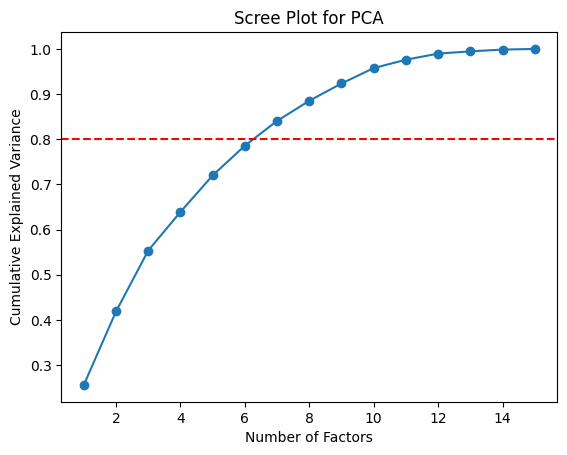

In [30]:
# Visualize explained variance to choose number of factors
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.axhline(y=0.8, color='r', linestyle='--')  # Target 80% variance
plt.show()

In [32]:
# Select number of factors (e.g., where cumulative variance > 80%)
n_factors = np.argmax(explained_var >= 0.8) + 1  # +1 because argmax is 0-indexed
print(f'Selected {n_factors} factors explaining {explained_var[n_factors-1]:.2%} variance.')

# Refit PCA with selected n_factors
pca = PCA(n_components=n_factors)
pca.fit(returns_scaled)

# Factor Loadings (Betas): shape (30 assets x n_factors)
betas = pca.components_.T  # Transpose to match (assets x factors)

# Factor Returns: Project scaled returns onto factors, shape (T-1 x n_factors)
factor_returns = pca.transform(returns_scaled)

# Idiosyncratic (residual) variances: Variance of residuals
residuals = returns_scaled - np.dot(factor_returns, pca.components_)
idio_vars = np.var(residuals, axis=0)  # Diagonal matrix elements

Selected 7 factors explaining 84.06% variance.


In [33]:
# Step 4: Estimate Factor Covariance (diagonal since PCA factors are orthogonal)
factor_cov = np.diag(pca.explained_variance_)  # Shape (n_factors x n_factors)

# Estimate Expected Factor Returns (historical mean for simplicity)
expected_factor_returns = np.mean(factor_returns, axis=0)  # Shape (n_factors,)

In [48]:
# Step 5: Produce Asset Expected Returns (Mu) and Covariance Matrix (Sigma)
# Mu: Betas @ expected_factor_returns (denormalize by original std if needed, but since standardized, adjust)
# Note: Since we standardized, mu is in standardized space; for real returns, use original scale
mu_original = np.mean(returns, axis=0).values  # Use historical asset means for baseline
mu_factor = np.dot(betas, expected_factor_returns) * scaler.scale_ + scaler.mean_  # Denormalize
mu = mu_factor  # Often use historical mu, or blend with factor-based

# Covariance matrix: B @ Sigma_F @ B.T + diag(idio_vars)
# Denormalize to original scale
sys_cov = np.dot(betas, np.dot(factor_cov, betas.T))  # Systematic component, shape (n_assets x n_assets)
# Scale systematic covariance to original units
scale_matrix = np.outer(scaler.scale_, scaler.scale_)  # Shape (n_assets x n_assets)
sys_cov_original = sys_cov * scale_matrix
# Scale idiosyncratic variances
idio_vars_original = idio_vars * scaler.scale_**2
# Full covariance matrix
sigma = sys_cov_original + np.diag(idio_vars_original)  # Shape (n_assets x n_assets)

In [54]:
# Step 6: Mean-Variance Optimization
def negative_sharpe(weights, mu, sigma):
    portfolio_return = np.dot(weights, mu)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(sigma, weights)))
    return -portfolio_return / portfolio_std

# Constraints: sum(weights)=1, no shorting
n_assets = len(mu)
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))
initial_weights = np.ones(n_assets) / n_assets

# Optimize
opt_result = minimize(negative_sharpe, initial_weights, args=(mu, sigma),
                     method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = opt_result.x
print('Optimal Portfolio Weights:')
print(pd.Series(optimal_weights, index=returns.columns).round(4))
port_return = np.dot(optimal_weights, mu)
port_std = np.sqrt(np.dot(optimal_weights.T, np.dot(sigma, optimal_weights)))
print(f'Expected Portfolio Return: {port_return:.2%}')
print(f'Expected Portfolio Volatility: {port_std:.2%}')
print(f'Sharpe Ratio: {port_return / port_std:.2f}')

Optimal Portfolio Weights:
sym
GJGB10     0.1885
HSI        0.0000
HXC        0.0000
NDX        0.1094
NKY        0.0538
SHCOMP     0.0000
SHSZ300    0.0142
SPX        0.0000
UKX        0.0000
US10       0.0000
US1M       0.0067
US30       0.0247
USDDXY     0.3530
XAGUSD     0.0000
XAUUSD     0.2496
dtype: float64
Expected Portfolio Return: 0.02%
Expected Portfolio Volatility: 0.26%
Sharpe Ratio: 0.06
